# Chatbot
- [reference] https://python.langchain.com/v0.2/docs/tutorials/chatbot/


## Quickstart

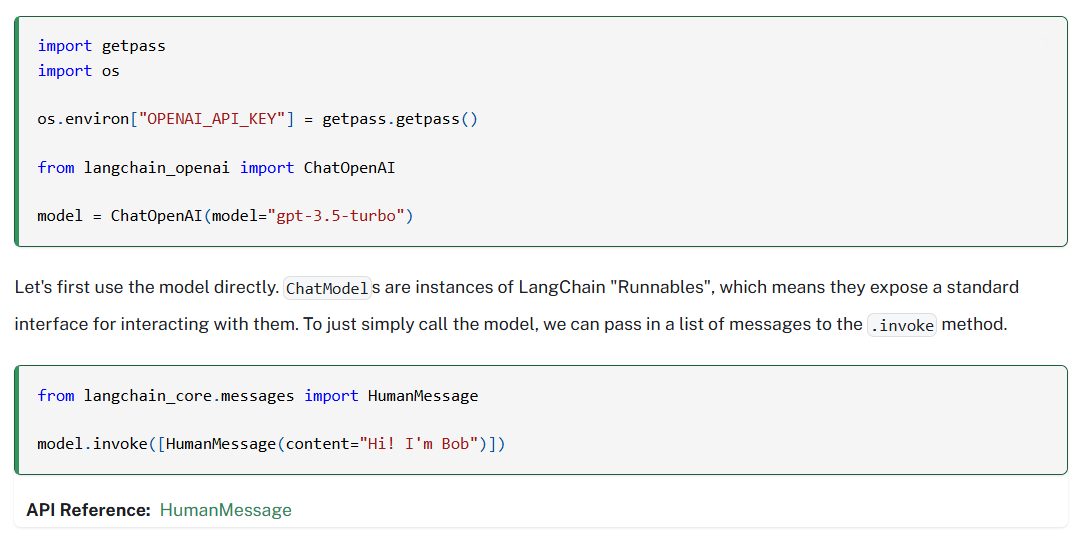

In [1]:
from langchain_openai import ChatOpenAI
from langchain_core.messages import HumanMessage
from dotenv import load_dotenv

In [2]:
load_dotenv()

True

In [3]:
model = ChatOpenAI(model='gpt-4o')
model

ChatOpenAI(client=<openai.resources.chat.completions.completions.Completions object at 0x000002A5E8177380>, async_client=<openai.resources.chat.completions.completions.AsyncCompletions object at 0x000002A5E818BB60>, root_client=<openai.OpenAI object at 0x000002A5E80A4D70>, root_async_client=<openai.AsyncOpenAI object at 0x000002A5E81774D0>, model_name='gpt-4o', model_kwargs={}, openai_api_key=SecretStr('**********'))

In [4]:
ai_message = model.invoke(
  [
    HumanMessage(content='Hi! I am Bob~')
  ]
)

In [5]:
ai_message

AIMessage(content='Hello, Bob! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 11, 'prompt_tokens': 13, 'total_tokens': 24, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_76544d79cb', 'id': 'chatcmpl-BcMlE8nEDjXMlapsQx8Gp325n21ne', 'finish_reason': 'stop', 'logprobs': None}, id='run-0d7c573b-c6f2-4091-9b2e-f2c96514ecf6-0', usage_metadata={'input_tokens': 13, 'output_tokens': 11, 'total_tokens': 24, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [6]:
ai_message.content

'Hello, Bob! How can I assist you today?'

In [7]:
ai_message_02 = model.invoke('What is my name?')
ai_message_02

AIMessage(content="I'm sorry, but I don't have access to personal information about individuals, so I don't know your name.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 21, 'prompt_tokens': 12, 'total_tokens': 33, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BcMlFlwsz9ADb7TZWfVDi59YLzQLS', 'finish_reason': 'stop', 'logprobs': None}, id='run-728cf93d-37e2-464c-9620-60e02e0d48e1-0', usage_metadata={'input_tokens': 12, 'output_tokens': 21, 'total_tokens': 33, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [8]:
ai_message_03 = model.invoke([HumanMessage('What is my name?')])
ai_message_03

AIMessage(content="I'm sorry, but I don't have access to personal data about individuals unless it has been previously shared in the course of our conversation. If you would like to share your name or ask me a different question, please feel free to do so!", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 48, 'prompt_tokens': 12, 'total_tokens': 60, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BcMlGqBftSOisMJaTGmIc8D3xMbQJ', 'finish_reason': 'stop', 'logprobs': None}, id='run-b30fb84d-7a3b-463f-8801-38381f145607-0', usage_metadata={'input_tokens': 12, 'output_tokens': 48, 'total_tokens': 60, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0

In [9]:
from langchain_core.messages import AIMessage

ai_message_04 = model.invoke(
  [
    HumanMessage(content='Hi! Im bob'),
    AIMessage(content="Hello Bob! How can I assist you today?"),
    HumanMessage(content="What is my name?"),
  ]
)

In [10]:
ai_message_04.content


'You mentioned that your name is Bob. How can I help you today?'

## Message History

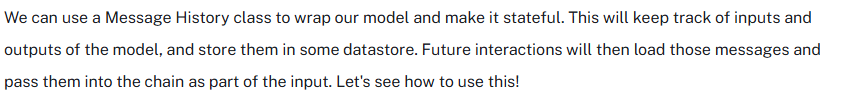

In [11]:
from langchain_core.chat_history import (
  BaseChatMessageHistory,
  InMemoryChatMessageHistory,
)
#  ()를 넣은 이유는 줄바꿈을 하기 위해
from langchain_core.runnables.history import RunnableWithMessageHistory


store = {}
# session id 와 history를 넣기 위한 작업

def get_session_history(session_id: str) -> BaseChatMessageHistory:
  if session_id not in store:
    store[session_id] = InMemoryChatMessageHistory()
  return store[session_id]

with_message_history = RunnableWithMessageHistory(model, get_session_history)
    

In [12]:
config = {"configurable": {"session_id": "abc2"}}

response = with_message_history.invoke(
  [HumanMessage(content="Hi! I am Bob")],
  config=config,
)

response.content

'Hello Bob! How can I assist you today?'

In [13]:
response = with_message_history.invoke(
  [HumanMessage(content="what's my name?")],
  config=config,  
)

response.content

'You mentioned that your name is Bob. How can I help you further?'

In [14]:
# 대화 이력 출력
history = get_session_history("abc2").messages
history

[HumanMessage(content='Hi! I am Bob', additional_kwargs={}, response_metadata={}),
 AIMessage(content='Hello Bob! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 12, 'total_tokens': 22, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BcMlJdgNiH5u4TndP95FzydOHG8YW', 'finish_reason': 'stop', 'logprobs': None}, id='run-8b58c0ba-bb0b-4248-83f5-02dcd6243fc8-0', usage_metadata={'input_tokens': 12, 'output_tokens': 10, 'total_tokens': 22, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}}),
 HumanMessage(content="what's my name?", additional_kwargs={}, response_metadata={}),
 AIMessage(content='You 

In [15]:
# 첫번째 질문(HumanMessage)출력
history[0].content

'Hi! I am Bob'

In [16]:
config = {"configurable": {"session_id": "def1"}}

response = with_message_history.invoke(
  [HumanMessage(content="What's my name?")],
  config=config,
)

response.content

"I'm sorry, I can't determine your name."

In [17]:
history2 = get_session_history("def1").messages

history2

[HumanMessage(content="What's my name?", additional_kwargs={}, response_metadata={}),
 AIMessage(content="I'm sorry, I can't determine your name.", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 11, 'total_tokens': 20, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BcMlLbklLdKgLnriqc1TCOunz0QkJ', 'finish_reason': 'stop', 'logprobs': None}, id='run-7b640269-4d34-48d4-bb17-96b9e5bcc02a-0', usage_metadata={'input_tokens': 11, 'output_tokens': 9, 'total_tokens': 20, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]

In [18]:
for text in history2:
  print(text.content)

What's my name?
I'm sorry, I can't determine your name.


In [19]:

config = {"configurable": {"session_id": "abc2"}}
response = with_message_history.invoke(
  [HumanMessage(content="what's my name?")],
  config=config,
)

response.content

"You initially mentioned that your name is Bob. Is there anything else you'd like to discuss or ask about?"

### Prompt Templates


In [20]:
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder

prompt = ChatPromptTemplate.from_messages(
  [
    (
      "system",
      "You are a helpful assistant. Answer all questions to be the best of your ability."
    ),
    MessagesPlaceholder(variable_name="messages"),
  ]
)

chain = prompt | model

In [21]:
response = chain.invoke({"messages": [HumanMessage(content="Hi! I'm Jun")]})

response.content

'Hello, Jun! How can I assist you today?'

In [22]:
len(store)

2

In [23]:
with_message_history = RunnableWithMessageHistory(chain, get_session_history)

config = {"configurable": {"session_id": "abc5"}}

response = with_message_history.invoke(
  [HumanMessage(content="Hi! I'm Alice")],
  config=config,
)

response.content

'Hi Alice! How can I help you today?'

In [24]:
get_session_history("abc5").messages

[HumanMessage(content="Hi! I'm Alice", additional_kwargs={}, response_metadata={}),
 AIMessage(content='Hi Alice! How can I help you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 10, 'prompt_tokens': 32, 'total_tokens': 42, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_07871e2ad8', 'id': 'chatcmpl-BcMlONWoyUbEtpvXoqHlB7ucecTcI', 'finish_reason': 'stop', 'logprobs': None}, id='run-a3506ca0-588a-48bf-ae1e-fa6bd2eb15f1-0', usage_metadata={'input_tokens': 32, 'output_tokens': 10, 'total_tokens': 42, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})]

In [25]:
get_session_history("abc5").messages[0]

HumanMessage(content="Hi! I'm Alice", additional_kwargs={}, response_metadata={})

In [26]:
response = with_message_history.invoke(
  [HumanMessage(content="what's my name?")],
  config=config,
)

response.content

'Your name is Alice!'

In [27]:
for text in get_session_history("abc5").messages:
  # print(text.type.upper(), text.content)
  print(f'[{text.type.upper()}]: {text.content}')

[HUMAN]: Hi! I'm Alice
[AI]: Hi Alice! How can I help you today?
[HUMAN]: what's my name?
[AI]: Your name is Alice!


In [28]:
get_session_history("abc5").messages[0]

HumanMessage(content="Hi! I'm Alice", additional_kwargs={}, response_metadata={})

In [29]:
get_session_history("abc5").messages[0].type

'human'

In [30]:
get_session_history("abc5").messages[0].type.upper()

'HUMAN'

In [31]:
prompt = ChatPromptTemplate.from_messages(
  [
    ("system",
     "You are a helpful assistant. Answer all questions to the best of your ability in {language}."),
    MessagesPlaceholder(variable_name="messages"),
  ]
)
#  현재는 템플릿, 형식만 지정. 완성되지않음. 이유-{language}의 값이 정의되지않음.
# message에 들어갈 것 - history<< 변수명을 마음대로 설정한 것.
#  messagesPlaceholder에는 대화내역 여러개가 들어갈 수 있음.type여러개.

chain = prompt | model

response = chain.invoke(
  {"messages": [HumanMessage(content="Hi! I'm Bob")], "language":"korean"} 
)
# language에 값을 넣어 완성된 프롬프트 작성.

response.content

'안녕하세요, Bob! 만나서 반갑습니다. 어떻게 도와드릴까요?'

- Let's now wrap this more complicated chain in a Message History class. This time, because there are multiple keys in the input, we need to specify the correct key to use to save the chat history.

In [32]:
with_message_history = RunnableWithMessageHistory(
  chain,
  get_session_history,
  # history_messages_key='messages' 대화이력 설정을 해야하지만 하지않음.
  input_messages_key="messages",
)
#  input_messages_key = HumanMessage(input< 사용자가 넣은 값이기 때문.)

config = {"configurable": {"session_id":"abc12"}}

response = with_message_history.invoke(
  {"messages": [HumanMessage(content="Hi! I'm todd")], "language":"korean"},
  # HumanMessage > input_message_key
  config=config
)

response.content


'안녕하세요, Todd! 만나서 반갑습니다. 어떻게 도와드릴까요?'

In [33]:
len(store)

4

In [34]:
get_session_history("abc12")

InMemoryChatMessageHistory(messages=[HumanMessage(content="Hi! I'm todd", additional_kwargs={}, response_metadata={}), AIMessage(content='안녕하세요, Todd! 만나서 반갑습니다. 어떻게 도와드릴까요?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 18, 'prompt_tokens': 33, 'total_tokens': 51, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_a288987b44', 'id': 'chatcmpl-BcMlREF6YH7OWAQ9SsPfei2unCrxQ', 'finish_reason': 'stop', 'logprobs': None}, id='run-413c3793-9b56-4113-9c36-fca914455672-0', usage_metadata={'input_tokens': 33, 'output_tokens': 18, 'total_tokens': 51, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})])

In [35]:
response = with_message_history.invoke(
  {"messages": [HumanMessage(content="What's my name?")], "language":"korean"},
  config=config,
)

response.content

'당신의 이름은 Todd 입니다. 도움이 필요하시면 언제든지 말씀해 주세요!'

## Managing Conversation History

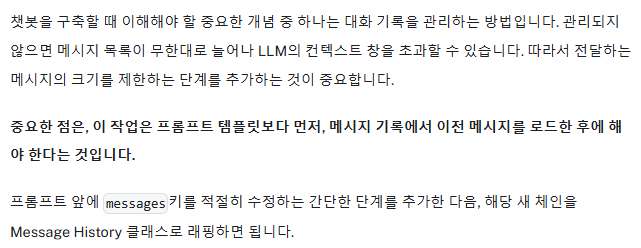

In [36]:
from langchain_core.messages import SystemMessage, trim_messages

trimmer = trim_messages(
  max_tokens=65,
  strategy="last",
  token_counter=model,
  include_system=True,
  allow_partial=False,
  start_on="human",
)

messages = [
  SystemMessage(content="You are a good assistant"),
  HumanMessage(content="Hi! I'm Bob"),
  AIMessage(content="Hi!"),
  HumanMessage(content="I like vanila ice cream"),
  AIMessage(content="nice"),
  HumanMessage(content="whats 2+2"),
  AIMessage(content="4"),
  HumanMessage(content="thanks"),
  AIMessage(content="no problem!"),
  HumanMessage(content="having fun?"),
  AIMessage(content="yes!"),
]

trimmer.invoke(messages)

[SystemMessage(content='You are a good assistant', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='whats 2+2', additional_kwargs={}, response_metadata={}),
 AIMessage(content='4', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='thanks', additional_kwargs={}, response_metadata={}),
 AIMessage(content='no problem!', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='having fun?', additional_kwargs={}, response_metadata={}),
 AIMessage(content='yes!', additional_kwargs={}, response_metadata={})]